In [136]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Parsing FASTA File

In [137]:
def parse_fasta(file_path):
    sequences = []
    with open(file_path, 'r') as file:
        content = file.read().strip()

    # Split the content by the '>' character, which marks the start of a new sequence
    entries = content.split('>')
    
    for entry in entries:
        if entry:
            # Split each entry into lines
            lines = entry.split('\n')
            # The first line is the header
            header = lines[0].strip()
            # The remaining lines are the sequence
            sequence = ''.join(lines[1:]).strip()
            # Append the header and sequence to the list as a tuple
            sequences.append((header, sequence.upper()))
    
    return sequences

In [138]:
# load sequence/FASTA data
sequences = parse_fasta('/Users/sham/Desktop/Dr. Hanson Research/class_material_analysis/Hanseniaspora osmophila/data/ncbi_dataset/ncbi_dataset/data/GCA_001747045.1/GCA_001747045.1_ASM174704v1_genomic.fna')
# load GTF data
GTF_df = pd.read_csv('/Users/sham/Desktop/Dr. Hanson Research/class_material_analysis/Hanseniaspora osmophila/data/ncbi_dataset/ncbi_dataset/data/GCA_001747045.1/genomic.gtf', sep='\t', comment='#', header=None)

# Number of Scaffolds

In [139]:
print('Number of scaffolds: ', len(sequences))

Number of scaffolds:  17


In [140]:
for i in range(17):
    print(i, sequences[i][0])

0 LPNM01000001.1 Hanseniaspora osmophila strain AWRI3579 Hanseniaspora_osmophila_AWRI3579_scaffold1, whole genome shotgun sequence
1 LPNM01000010.1 Hanseniaspora osmophila strain AWRI3579 Hanseniaspora_osmophila_AWRI3579_scaffold10, whole genome shotgun sequence
2 LPNM01000011.1 Hanseniaspora osmophila strain AWRI3579 Hanseniaspora_osmophila_AWRI3579_scaffold11, whole genome shotgun sequence
3 LPNM01000012.1 Hanseniaspora osmophila strain AWRI3579 Hanseniaspora_osmophila_AWRI3579_scaffold12, whole genome shotgun sequence
4 LPNM01000002.1 Hanseniaspora osmophila strain AWRI3579 Hanseniaspora_osmophila_AWRI3579_scaffold2, whole genome shotgun sequence
5 LPNM01000013.1 Hanseniaspora osmophila strain AWRI3579 Hanseniaspora_osmophila_AWRI3579_scaffold284, whole genome shotgun sequence
6 LPNM01000014.1 Hanseniaspora osmophila strain AWRI3579 Hanseniaspora_osmophila_AWRI3579_scaffold285, whole genome shotgun sequence
7 LPNM01000015.1 Hanseniaspora osmophila strain AWRI3579 Hanseniaspora_osmop

## Define Functions

In [141]:
def complement_seq(seq):
    seq_list = list(seq)

    for i in range(len(seq_list)):
        if seq_list[i] == 'A':
            seq_list[i] = 'T'
        elif seq_list[i] == 'T':
            seq_list[i] = 'A'
        elif seq_list[i] == 'G':
            seq_list[i] = 'C'
        else:
            seq_list[i] = 'G'
    return ''.join(seq_list)

# reset indexing
def reset_df(df):
    out_df = df.reset_index()
    out_df = out_df.drop('index', axis=1)
    return out_df

def filter_irregular_gene(df):
    to_drop = []
    for i in range(len(df)):
        if (df.iloc[i,8][21] == 't' or df.iloc[i,8][21] == 'r'):
            to_drop.append(i)
    df = df.drop(to_drop)
    df = reset_df(df)

    print('to drop: ', to_drop)

    return df

## Get CDS data only

In [142]:
# Get gene and CDS data only
GTF_gene_and_cds = GTF_df[GTF_df[2].isin(['CDS'])]
GTF_gene_and_cds = reset_df(GTF_gene_and_cds)

# get chromosome names
GTF_gene_and_cds.iloc[:,0].unique()

array(['LPNM01000001.1', 'LPNM01000010.1', 'LPNM01000011.1',
       'LPNM01000012.1', 'LPNM01000002.1', 'LPNM01000014.1',
       'LPNM01000015.1', 'LPNM01000016.1', 'LPNM01000017.1',
       'LPNM01000003.1', 'LPNM01000004.1', 'LPNM01000005.1',
       'LPNM01000006.1', 'LPNM01000007.1', 'LPNM01000008.1',
       'LPNM01000009.1'], dtype=object)

## Seperate scaffold-wise data

In [143]:
# separate by scaffold and filter irregular gene
# filter_irregular_gene() doesn't do anything for S. ludiwigii - was made for Y. lipolytoca
GTF_chr1_gene_cds = filter_irregular_gene(reset_df(GTF_gene_and_cds[GTF_gene_and_cds[0] == 'LPNM01000001.1']))
GTF_chr2_gene_cds = filter_irregular_gene(reset_df(GTF_gene_and_cds[GTF_gene_and_cds[0] == 'LPNM01000010.1']))
GTF_chr3_gene_cds = filter_irregular_gene(reset_df(GTF_gene_and_cds[GTF_gene_and_cds[0] == 'LPNM01000011.1']))
GTF_chr4_gene_cds = filter_irregular_gene(reset_df(GTF_gene_and_cds[GTF_gene_and_cds[0] == 'LPNM01000012.1']))
GTF_chr5_gene_cds = filter_irregular_gene(reset_df(GTF_gene_and_cds[GTF_gene_and_cds[0] == 'LPNM01000002.1']))
GTF_chr6_gene_cds = filter_irregular_gene(reset_df(GTF_gene_and_cds[GTF_gene_and_cds[0] == 'LPNM01000013.1']))
GTF_chr7_gene_cds = filter_irregular_gene(reset_df(GTF_gene_and_cds[GTF_gene_and_cds[0] == 'LPNM01000014.1']))
GTF_chr8_gene_cds = filter_irregular_gene(reset_df(GTF_gene_and_cds[GTF_gene_and_cds[0] == 'LPNM01000015.1']))
GTF_chr9_gene_cds = filter_irregular_gene(reset_df(GTF_gene_and_cds[GTF_gene_and_cds[0] == 'LPNM01000016.1']))
GTF_chr10_gene_cds = filter_irregular_gene(reset_df(GTF_gene_and_cds[GTF_gene_and_cds[0] == 'LPNM01000017.1']))
GTF_chr11_gene_cds = filter_irregular_gene(reset_df(GTF_gene_and_cds[GTF_gene_and_cds[0] == 'LPNM01000003.1']))
GTF_chr12_gene_cds = filter_irregular_gene(reset_df(GTF_gene_and_cds[GTF_gene_and_cds[0] == 'LPNM01000004.1']))
GTF_chr13_gene_cds = filter_irregular_gene(reset_df(GTF_gene_and_cds[GTF_gene_and_cds[0] == 'LPNM01000005.1']))
GTF_chr14_gene_cds = filter_irregular_gene(reset_df(GTF_gene_and_cds[GTF_gene_and_cds[0] == 'LPNM01000006.1']))
GTF_chr15_gene_cds = filter_irregular_gene(reset_df(GTF_gene_and_cds[GTF_gene_and_cds[0] == 'LPNM01000007.1']))
GTF_chr16_gene_cds = filter_irregular_gene(reset_df(GTF_gene_and_cds[GTF_gene_and_cds[0] == 'LPNM01000008.1']))
GTF_chr17_gene_cds = filter_irregular_gene(reset_df(GTF_gene_and_cds[GTF_gene_and_cds[0] == 'LPNM01000009.1']))

to drop:  []
to drop:  []
to drop:  []
to drop:  []
to drop:  []
to drop:  []
to drop:  []
to drop:  []
to drop:  []
to drop:  []
to drop:  []
to drop:  []
to drop:  []
to drop:  []
to drop:  []
to drop:  []
to drop:  []


## Filter scaffolds with less than 20 CDSs

In [144]:
print("GTF_chr1 :  ",len(GTF_chr1_gene_cds ))
print("GTF_chr2 :  ",len(GTF_chr2_gene_cds ))
print("GTF_chr3 :  ",len(GTF_chr3_gene_cds ))
print("GTF_chr4 :  ",len(GTF_chr4_gene_cds ))
print("GTF_chr5 :  ",len(GTF_chr5_gene_cds ))
print("GTF_chr6 :  ",len(GTF_chr6_gene_cds ))
print("GTF_chr7 :  ",len(GTF_chr7_gene_cds ))
print("GTF_chr8 :  ",len(GTF_chr8_gene_cds ))
print("GTF_chr9 :  ",len(GTF_chr9_gene_cds ))
print("GTF_chr10:  ",len(GTF_chr10_gene_cds))
print("GTF_chr11:  ",len(GTF_chr11_gene_cds))
print("GTF_chr12:  ",len(GTF_chr12_gene_cds))
print("GTF_chr13:  ",len(GTF_chr13_gene_cds))
print("GTF_chr14:  ",len(GTF_chr14_gene_cds))
print("GTF_chr15:  ",len(GTF_chr15_gene_cds))
print("GTF_chr16:  ",len(GTF_chr16_gene_cds))
print("GTF_chr17:  ",len(GTF_chr17_gene_cds))

GTF_chr1 :   255
GTF_chr2 :   366
GTF_chr3 :   559
GTF_chr4 :   253
GTF_chr5 :   40
GTF_chr6 :   0
GTF_chr7 :   2
GTF_chr8 :   2
GTF_chr9 :   3
GTF_chr10:   23
GTF_chr11:   301
GTF_chr12:   8
GTF_chr13:   431
GTF_chr14:   686
GTF_chr15:   827
GTF_chr16:   698
GTF_chr17:   368


## Functoins to calculate window-wise GC3 percentage

In [145]:
def depricated_get_cds_gene_idx(seq, gtf):
    
    # list of indexes list that have the strand info and all the cds indexes of a gene
    # example: [['+', 1], ['-', 3, 4, 5], ['-', 7, 8, 9, 10], ['+', 12], ['+', 14], ...]
    gene_cds_idx = []
    ind_idx = ['x']
    for i in range(1, len(gtf)):
        if (gtf.iloc[i,2] != 'gene'):
            ind_idx.append(i)
            ind_idx[0] = gtf.iloc[i,6]
        elif (gtf.iloc[i,2] == 'gene'):
            gene_cds_idx.append(ind_idx)
            ind_idx = ['x']
    gene_cds_idx.append(ind_idx)

    print(gene_cds_idx)
    print(len(gene_cds_idx))
    
    gene_cds_sequences = []

    tot=0
    miss=0

    for cds_range in gene_cds_idx:
        seq_str = ''
        frame_skip = 0
        if cds_range[0] == '+':
            for idx in cds_range[1:]:
                frame_skip = int(gtf.iloc[idx,7])
                seq_str += seq[gtf.iloc[idx,3]-1+frame_skip : gtf.iloc[idx,4]]
                frame_skip = 0
            gene_cds_sequences.append(seq_str)
            tot+=1
        elif cds_range[0] == '-':
            for idx in cds_range[1:]:
                frame_skip = int(gtf.iloc[idx,7])
                seq_str += complement_seq(seq[gtf.iloc[idx,3]-1 : gtf.iloc[idx,4]-frame_skip])[::-1]
                frame_skip = 0
            gene_cds_sequences.append(seq_str)
            tot+=1
        else:
            miss+=1
            print(cds_range[0])

    print("tot",tot)
    print("miss", miss)
    
    return gene_cds_sequences


def calc_gc3_pct(gene_seqs, window):
    pct_arr = []
    for seq in gene_seqs:
        codon3_ct = 0
        gc3_ct = 0
        for i in range(2,len(seq),3):
            if (seq[i] == 'G' or seq[i] == 'C'):
                gc3_ct += 1
            codon3_ct += 1
        if (codon3_ct != 0):
            pct_arr.append((gc3_ct / codon3_ct) * 100)
        else:
            pct_arr.append(0)

    print(pct_arr)
    
    window_pct_arr = []
    for i in range(len(pct_arr)-window+1):
        window_range = pct_arr[i:i + window]
        window_avg = sum(window_range) / window
        window_pct_arr.append(window_avg)

    return window_pct_arr

In [146]:
def get_cds_gene_idx(seq, gtf):
    gene_cds_idx = []
    
    # Create a list of tuples [(strand, [indices])]
    for i in range(len(gtf)):
        strand = gtf.iloc[i, 6]  # Strand info (+/-)
        index = i  # Row index in GTF
        gene_cds_idx.append((strand, [index]))  # Store as tuple

    gene_cds_sequences = []

    for cds_range in gene_cds_idx:
        seq_str = ''
        frame_skip = 0
        strand = cds_range[0]
        indices = cds_range[1]  # List of indices

        if strand == '+':  # Forward strand
            for idx in indices:
                if isinstance(idx, int):  # Ensure idx is an integer
                    frame_skip = int(gtf.iloc[idx, 7])
                    seq_str += seq[gtf.iloc[idx, 3] - 1 + frame_skip : gtf.iloc[idx, 4]]
                    frame_skip = 0
            gene_cds_sequences.append(seq_str)

        elif strand == '-':  # Reverse strand
            for idx in indices:
                if isinstance(idx, int):  # Ensure idx is an integer
                    frame_skip = int(gtf.iloc[idx, 7])
                    seq_str += complement_seq(seq[gtf.iloc[idx, 3] - 1 : gtf.iloc[idx, 4] - frame_skip])[::-1]
                    frame_skip = 0
            gene_cds_sequences.append(seq_str)

        else:
            print("Unexpected strand value:", strand)


    return gene_cds_sequences


## Calculate GC3 pct for window size of 15 CDSs

In [147]:
chr1_gene_cds_seqs = get_cds_gene_idx(sequences[0][1], GTF_chr1_gene_cds)
chr2_gene_cds_seqs = get_cds_gene_idx(sequences[1][1], GTF_chr2_gene_cds)
chr3_gene_cds_seqs = get_cds_gene_idx(sequences[2][1], GTF_chr3_gene_cds)
chr4_gene_cds_seqs = get_cds_gene_idx(sequences[3][1], GTF_chr4_gene_cds)
chr5_gene_cds_seqs = get_cds_gene_idx(sequences[4][1], GTF_chr5_gene_cds)
chr10_gene_cds_seqs = get_cds_gene_idx(sequences[9][1], GTF_chr10_gene_cds)
chr11_gene_cds_seqs = get_cds_gene_idx(sequences[10][1], GTF_chr11_gene_cds)
chr13_gene_cds_seqs = get_cds_gene_idx(sequences[12][1], GTF_chr13_gene_cds)
chr14_gene_cds_seqs = get_cds_gene_idx(sequences[13][1], GTF_chr14_gene_cds)
chr15_gene_cds_seqs = get_cds_gene_idx(sequences[14][1], GTF_chr15_gene_cds)
chr16_gene_cds_seqs = get_cds_gene_idx(sequences[15][1], GTF_chr16_gene_cds)
chr17_gene_cds_seqs = get_cds_gene_idx(sequences[16][1], GTF_chr17_gene_cds)

# chr5_gene_cds_seqs and chr16_gene_cds_seqs has some empty sequence string in it, so filter them out
# chr5_gene_cds_seqs = [s for s in chr5_gene_cds_seqs if len(s) > 0]
# chr16_gene_cds_seqs = [s for s in chr16_gene_cds_seqs if len(s) > 0]

In [148]:
win_size = 15

chr1_gc3_pcts = calc_gc3_pct(chr1_gene_cds_seqs, win_size)
chr2_gc3_pcts = calc_gc3_pct(chr2_gene_cds_seqs, win_size)
chr3_gc3_pcts = calc_gc3_pct(chr3_gene_cds_seqs, win_size)
chr4_gc3_pcts = calc_gc3_pct(chr4_gene_cds_seqs, win_size)
chr5_gc3_pcts = calc_gc3_pct(chr5_gene_cds_seqs, win_size)
chr10_gc3_pcts = calc_gc3_pct(chr10_gene_cds_seqs, win_size)
chr11_gc3_pcts = calc_gc3_pct(chr11_gene_cds_seqs, win_size)
chr13_gc3_pcts = calc_gc3_pct(chr13_gene_cds_seqs, win_size)
chr14_gc3_pcts = calc_gc3_pct(chr14_gene_cds_seqs, win_size)
chr15_gc3_pcts = calc_gc3_pct(chr15_gene_cds_seqs, win_size)
chr16_gc3_pcts = calc_gc3_pct(chr16_gene_cds_seqs, win_size)
chr17_gc3_pcts = calc_gc3_pct(chr17_gene_cds_seqs, win_size)

[35.18299881936245, 34.93333333333333, 41.22657580919932, 41.69491525423729, 43.910806174957116, 40.0, 46.69926650366748, 40.55944055944056, 42.27886056971514, 38.405797101449274, 37.61904761904762, 37.1900826446281, 36.43564356435643, 34.89711934156379, 36.42224012892829, 43.187066974595844, 47.03947368421053, 43.69287020109689, 33.747779751332146, 38.13559322033898, 40.84084084084084, 48.04270462633452, 48.81398252184769, 46.391752577319586, 48.19672131147541, 39.58333333333333, 38.218923933209645, 39.83050847457627, 40.993788819875775, 41.03092783505154, 42.05607476635514, 35.27696793002916, 41.717791411042946, 41.05263157894737, 44.8051948051948, 37.44493392070485, 39.69594594594595, 35.785953177257525, 38.62068965517241, 30.985915492957744, 43.149807938540334, 45.2760736196319, 50.53763440860215, 44.18604651162791, 46.902654867256636, 49.84615384615385, 50.0, 38.56655290102389, 39.8671096345515, 36.024844720496894, 45.230769230769226, 47.607052896725435, 37.45819397993311, 44.1774

# Generate Bed File

In [149]:
def create_BED(gtf, pcts, win_size):
    out_df = pd.DataFrame(columns=['chrom', 'start', 'end', 'pct'])
    for i in range(len(gtf)-win_size+1):
        row = pd.DataFrame({'chrom': [gtf.iloc[i][0]], 
                            'start': [gtf.iloc[i][3]], 
                            'end': [gtf.iloc[i+win_size-1][4]], 
                            'pct': [round(pcts[i], 4)]})
        out_df = pd.concat([out_df, row], ignore_index=True)
    
    return out_df

In [150]:
bed1 = create_BED(GTF_chr1_gene_cds, chr1_gc3_pcts, win_size)
bed2 = create_BED(GTF_chr2_gene_cds, chr2_gc3_pcts, win_size)
bed3 = create_BED(GTF_chr3_gene_cds, chr3_gc3_pcts, win_size)
bed4 = create_BED(GTF_chr4_gene_cds, chr4_gc3_pcts, win_size)
bed5 = create_BED(GTF_chr5_gene_cds, chr5_gc3_pcts, win_size)
bed10 = create_BED(GTF_chr10_gene_cds, chr10_gc3_pcts, win_size)
bed11 = create_BED(GTF_chr11_gene_cds, chr11_gc3_pcts, win_size)
bed13 = create_BED(GTF_chr13_gene_cds, chr13_gc3_pcts, win_size)
bed14 = create_BED(GTF_chr14_gene_cds, chr14_gc3_pcts, win_size)
bed15 = create_BED(GTF_chr15_gene_cds, chr15_gc3_pcts, win_size)
bed16 = create_BED(GTF_chr16_gene_cds, chr16_gc3_pcts, win_size)
bed17 = create_BED(GTF_chr17_gene_cds, chr17_gc3_pcts, win_size)

all_bed = pd.concat([bed1, bed2, bed3, bed4, bed5, bed10, bed11, bed13, bed14, bed15, bed16, bed17], ignore_index=True)
all_bed.to_csv('/Users/sham/Desktop/Dr. Hanson Research/class_material_analysis/Hanseniaspora osmophila/H osmophila.bed', sep='\t', header=False, index=False)

/var/folders/1k/jj40mz3j3zj2w9gsgg7xpylm0000gn/T/ipykernel_61865/3028492884.py:8: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  out_df = pd.concat([out_df, row], ignore_index=True)
/var/folders/1k/jj40mz3j3zj2w9gsgg7xpylm0000gn/T/ipykernel_61865/3028492884.py:8: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  out_df = pd.concat([out_df, row], ignore_index=True)
/var/folders/1k/jj40mz3j3zj2w9gsgg7xpylm0000gn/T/ipykernel_61865/3028492884.py:8: FutureWarning: The behavior of DataFrame concatenation w

# plot scaffold-wise GC3 pcts

In [151]:
import matplotlib.pyplot as plt

def plot_gc3_percentage(chr_gc3_pcts, chr_name):
    # Create figure
    plt.figure(figsize=(8, 4))
    plt.plot(chr_gc3_pcts, label="GC3 Percentage")

    # Get the index of the minimum GC3 percentage
    min_index = chr_gc3_pcts.index(min(chr_gc3_pcts))
    min_value = min(chr_gc3_pcts)

    # Title with the location of minimum GC3 percentage
    plt.title(f'{chr_name}; window size: 15')

    # Setting the y-axis limits and ticks
    plt.ylim(30, 55)
    yticks = [30, 35, 40, 45, 50, 55]
    plt.yticks(yticks)

    # Adding horizontal lines at y-tick positions
    for y in yticks:
        plt.axhline(y=y, color='gray', linestyle='--', linewidth=0.5)

    # Adding x-ticks every 50 intervals
    xticks = range(0, len(chr_gc3_pcts), 50)
    plt.xticks(xticks, rotation=90)

    # Adding vertical lines at each x-tick
    for x in xticks:
        plt.axvline(x=x, color='gray', linestyle='--', linewidth=0.5)

    plt.xlabel('Window #')
    plt.ylabel('GC3 Percentage')

    # Adding a horizontal line 60 units long at the index of the minimum value
    # plt.hlines(y=min_value, xmin=max(min_index - win_size/2, 0), xmax=min_index + win_size/2, 
    #            color='red', linewidth=2, label='Window Considered')

    # Adding a marker at the minimum GC3 percentage
    # plt.scatter(min_index, min_value-.2, color='blue', zorder=1, label='Minimum GC3')

    # Adding a legend
    plt.legend()

    # Display the plot
    plt.show()

# Example usage:
# plot_gc3_percentage(chr1_gc3_pcts)


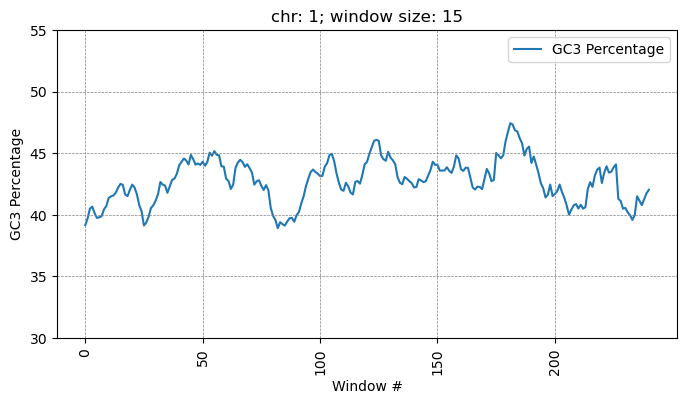

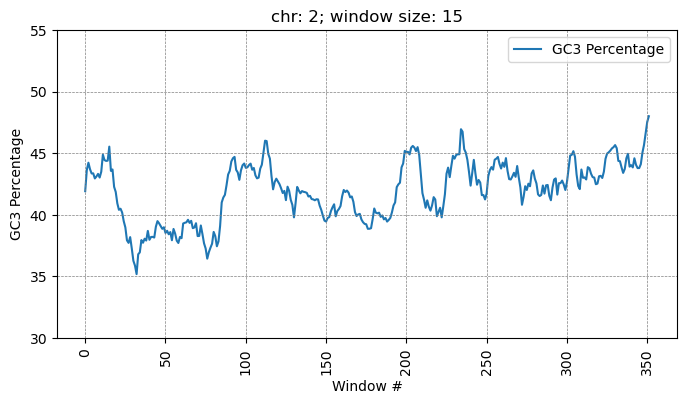

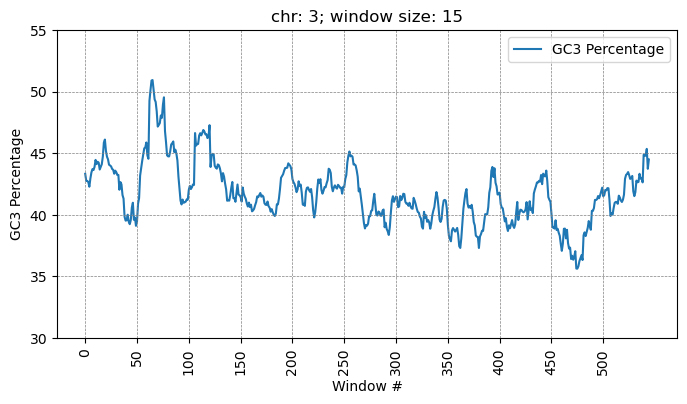

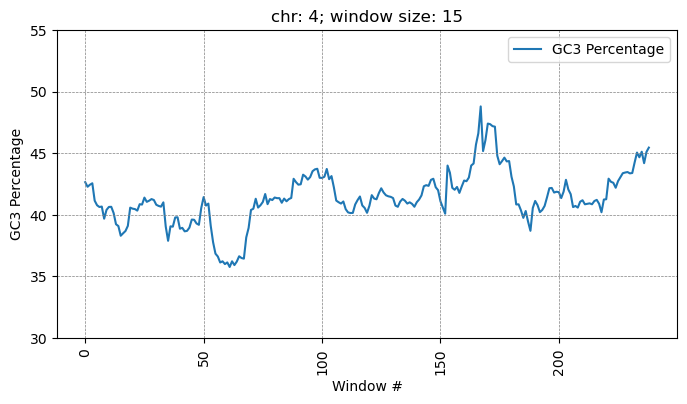

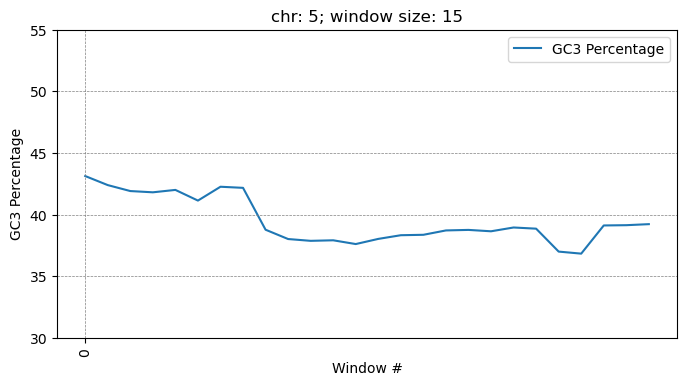

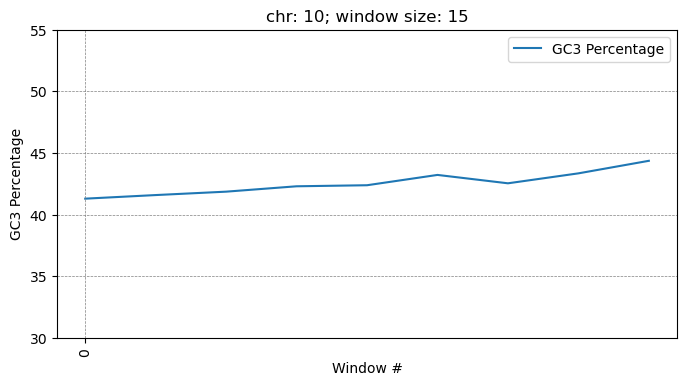

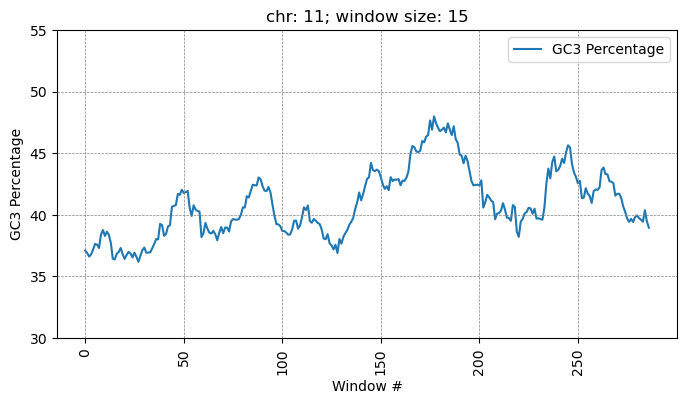

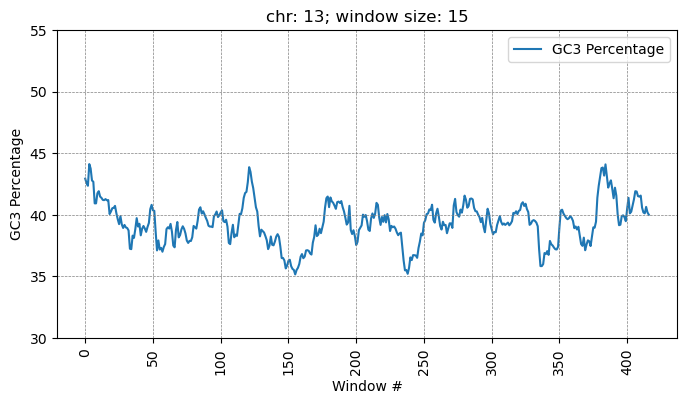

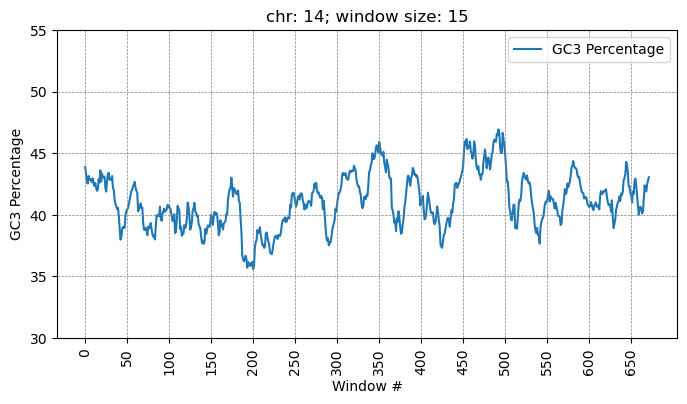

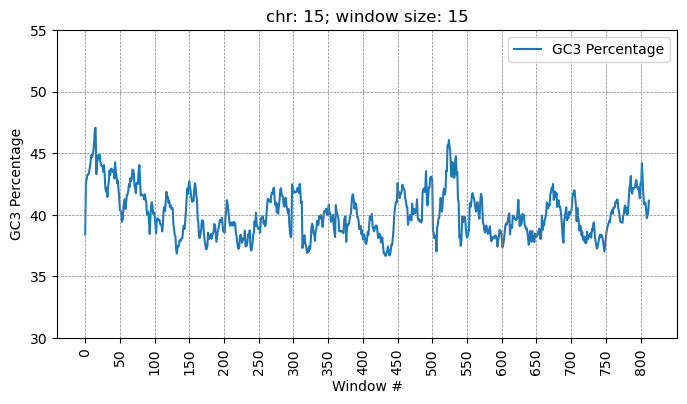

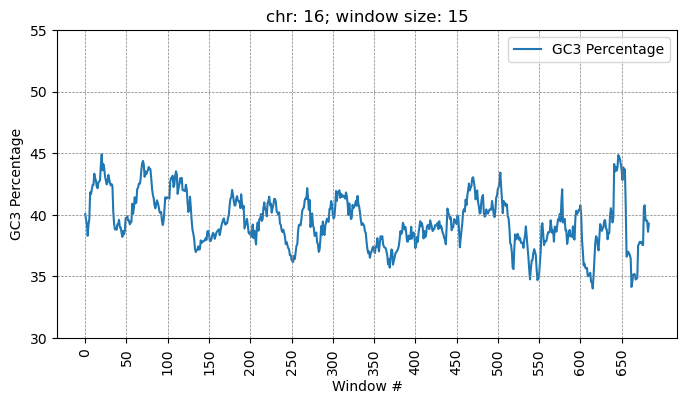

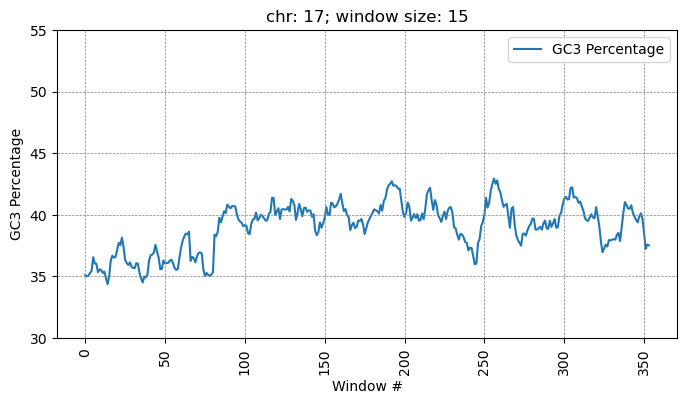

In [152]:
plot_gc3_percentage(chr1_gc3_pcts, "chr: 1")
plot_gc3_percentage(chr2_gc3_pcts, "chr: 2")
plot_gc3_percentage(chr3_gc3_pcts, "chr: 3")
plot_gc3_percentage(chr4_gc3_pcts, "chr: 4")
plot_gc3_percentage(chr5_gc3_pcts, "chr: 5")
plot_gc3_percentage(chr10_gc3_pcts, "chr: 10")
plot_gc3_percentage(chr11_gc3_pcts, "chr: 11")

plot_gc3_percentage(chr13_gc3_pcts, "chr: 13")
plot_gc3_percentage(chr14_gc3_pcts, "chr: 14")
plot_gc3_percentage(chr15_gc3_pcts, "chr: 15")
plot_gc3_percentage(chr16_gc3_pcts, "chr: 16")
plot_gc3_percentage(chr17_gc3_pcts, "chr: 17")

# plot whole genome GC3 plot (continious scaffolds)

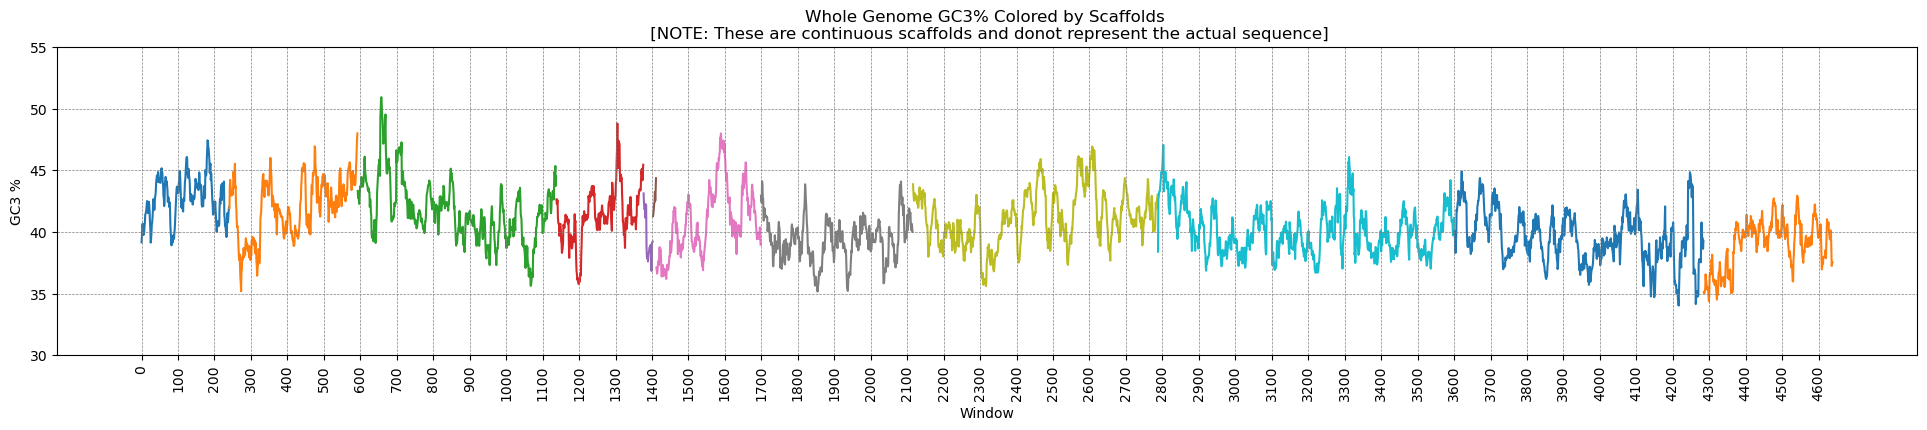

In [157]:
plt.figure(figsize=(24, 4))

sns.lineplot(x=all_bed.index, y=all_bed['pct'], hue=all_bed['chrom'], palette='tab10', legend=None)

plt.ylim(30, 55)
yticks = [30, 35, 40, 45, 50, 55]
plt.yticks(yticks)
for y in yticks:
    plt.axhline(y=y, color='gray', linestyle='--', linewidth=0.5)

xticks = range(0, 4700, 100)
plt.xticks(xticks, rotation=90)
for x in xticks:
    plt.axvline(x=x, color='gray', linestyle='--', linewidth=0.5)

plt.xlabel('Window')
plt.ylabel('GC3 %')
plt.title('Whole Genome GC3% Colored by Scaffolds \n [NOTE: These are continuous scaffolds and donot represent the actual sequence]')
plt.show()


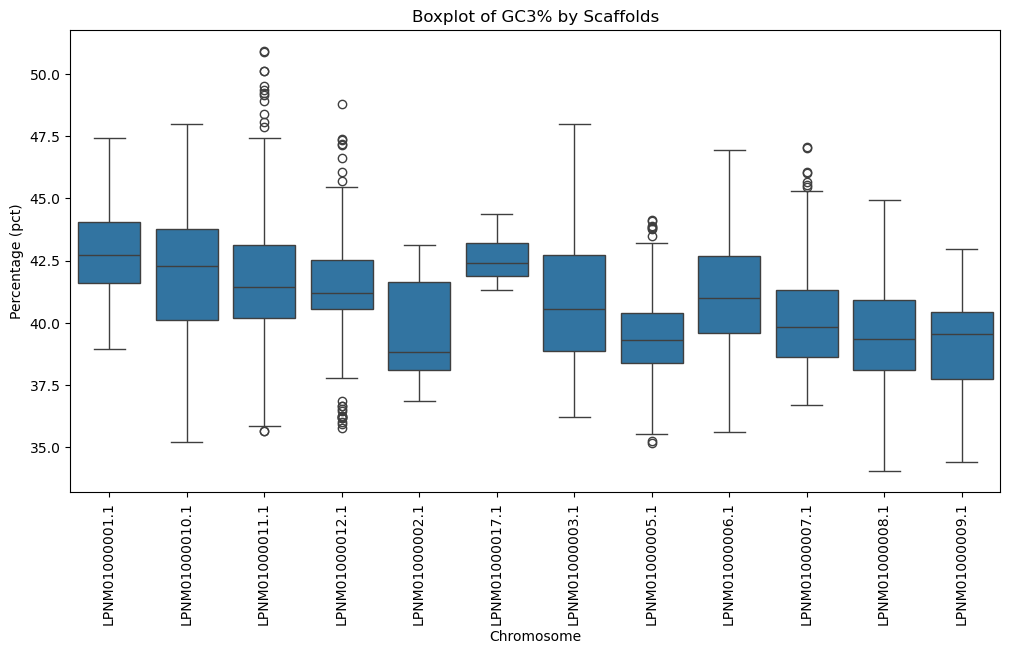

In [154]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='chrom', y='pct', data=all_bed)
plt.xticks(rotation=90)
plt.xlabel('Chromosome')
plt.ylabel('Percentage (pct)')
plt.title('Boxplot of GC3% by Scaffolds')
plt.show()

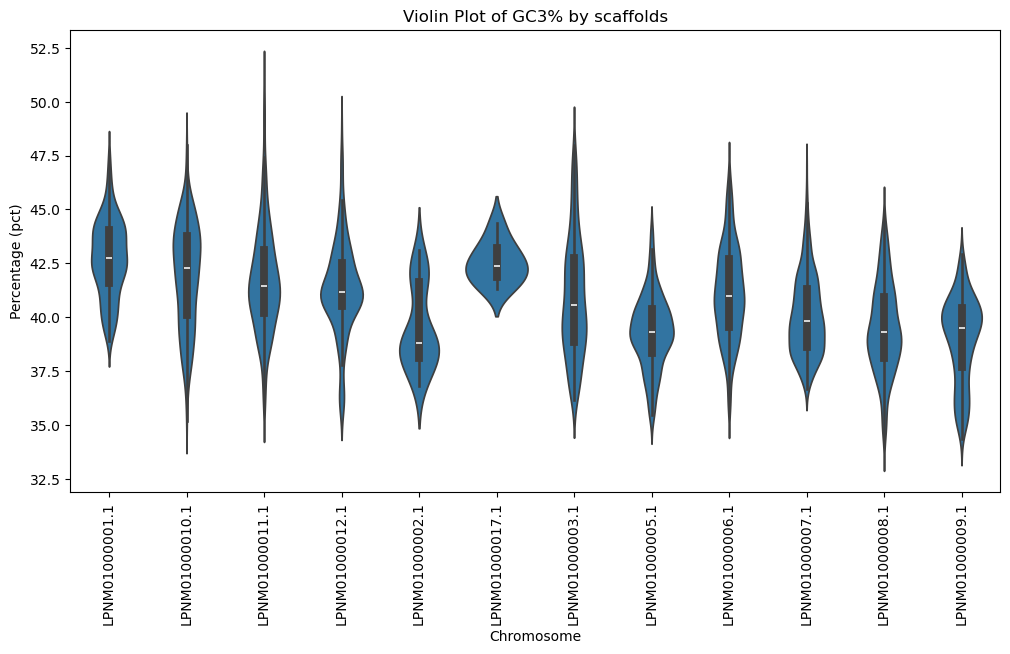

In [155]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrame is named all_bed
plt.figure(figsize=(12, 6))
sns.violinplot(x='chrom', y='pct', data=all_bed)
plt.xticks(rotation=90)  # Rotate x labels for better readability
plt.xlabel('Chromosome')
plt.ylabel('Percentage (pct)')
plt.title('Violin Plot of GC3% by scaffolds')
plt.show()


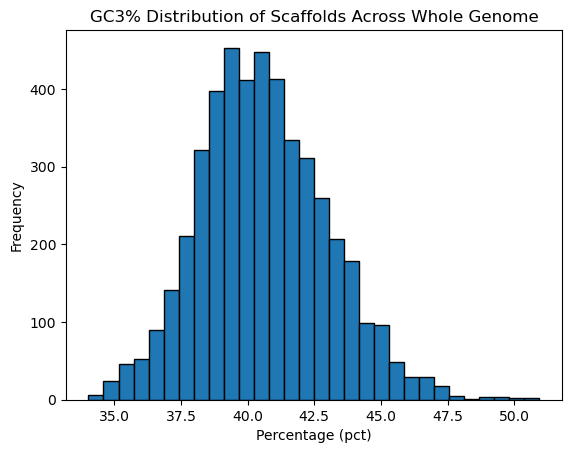

In [156]:
import matplotlib.pyplot as plt

# Assuming your DataFrame is named df
plt.hist(all_bed['pct'], bins=30, edgecolor='black')  # You can adjust the number of bins
plt.xlabel('Percentage (pct)')
plt.ylabel('Frequency')
plt.title('GC3% Distribution of Scaffolds Across Whole Genome')
plt.show()
